# **Lab Assignment 1 - Building neural networks**

Go through each task below and test to run the code to get familiar with it. 

Make a short report (pdf format) that includes: (1) plots/diagrams generated during training and evaluation, (2) key console output such as model summaries and training logs (loss/accuracy per epoch). Since the labs are only graded Pass/Fail, the report can be very simple, just copy and paste your results and figures given when running your program.

Upload your code as .py file/s.

During the scheduled lab sessions, present your code and report to a teacher. The focus should be on your observations, interpreting the results (what changed, why it matters). 

Further reading with code examples:

Tensor Operations and Neural Network Building Blocks: Tensor Operations and Building Blocks of Neural NetworksLinks to an external site.

Artificial Neural Networks using Keras: Introduction to Artificial Neural Networks with KerasLinks to an external site.

## **Task 1 — Tensor Manipulations (NumPy)**

We import NumPy and make printed numbers easier to read so we can quickly spot shape/value mistakes during exercises.

In [1]:
import numpy as np                        # import NumPy for array/tensor ops
np.set_printoptions(suppress=True)       # show floats without scientific notation for cleaner prints

### 1) **Create two sample tensors**
We create two 2×3 tensors with matching shapes so element-wise ops are legal and produce intuitive results. tensor: A tensor is just a multi-dimensional array of numbers. In NumPy that’s a regular ndarray.
dtype: dtype is the data type of array elements (e.g., float32). It controls precision and memory.
broadcast: Broadcasting lets NumPy operate on arrays of different shapes by virtually expanding dimensions.

In [2]:
a = np.array([[1, 2, 3],                    # define a 2x3 matrix (dtype float32 for NN-friendly math)
              [4, 5, 6]], dtype=np.float32)     # rows are [1,2,3] and [4,5,6]
b = np.ones((2, 3), dtype=np.float32) * 10      # 2x3 matrix full of 10s, matches shape of 'a'
print("a:\n", a)                                # inspect 'a' to verify shape and values
print("b:\n", b)                                # inspect 'b' to verify shape and values

a:
 [[1. 2. 3.]
 [4. 5. 6.]]
b:
 [[10. 10. 10.]
 [10. 10. 10.]]


### 2) **Element-wise addition**
We add tensors entry-by-entry to merge signals (e.g., bias/offset per feature) without changing shapes.

In [3]:
c_add = a + b                             # element-wise addition since shapes align (2x3)
print("a + b:\n", c_add)                        # result: each entry is a_ij + b_ij

a + b:
 [[11. 12. 13.]
 [14. 15. 16.]]


### 3) **Element-wise multiplication**
We multiply tensors element-wise to scale features or apply masks (common for gating or attention).

In [4]:
c_mul = a * b                             # element-wise multiplication (Hadamard product)
print("a * b:\n", c_mul)                        # each entry is a_ij * b_ij

a * b:
 [[10. 20. 30.]
 [40. 50. 60.]]


### 4) **Reshape a tensor**
We change the shape view of the same data to match API expectations (no data copy), which is faster and memory-friendly. reshape: Reshape changes the view (shape) of data without altering the underlying values.

In [5]:
r = np.reshape(a, (3, 2))                # reshape without changing data: (2,3) -> (3,2)
# r = a.reshape(3, 2)                               # equivalent method call on the array
print("reshape (3,2):\n", r)                     # confirm new shape and layout

reshape (3,2):
 [[1. 2.]
 [3. 4.]
 [5. 6.]]


### 5) **Slicing & indexing**
We select rows, columns, and regions so we can focus operations or inspect subsets without cloning the data. slice: Slicing selects rows/columns/ranges using start:stop indexing and often returns views.

In [6]:
print("first row:", a[0])                 # index row 0 -> [1,2,3]
print("second column:", a[:, 1])              # slice all rows, column index 1 -> [2,5]
print("submatrix:\n", a[0:2, 1:3])           # rows [0..1], cols [1..2] -> [[2,3],[5,6]]

first row: [1. 2. 3.]
second column: [2. 5.]
submatrix:
 [[2. 3.]
 [5. 6.]]


### 6) **Combining tensors (concatenate / stack)**

We join along an axis to build wider/taller matrices, or stack to add a new dimension (e.g., batch/channel) for models. concatenate: concatenate joins arrays along an existing axis; shapes must match on other axes.
stack: stack adds a new axis, creating a higher-rank tensor with the inputs along that axis.

In [7]:
# concatenate vs stack: concatenate joins along an existing axis; stack creates a new axis
cat_cols = np.concatenate([a, b], axis=1)      # concat columns -> shapes must match except axis=1 (now (2,6))
cat_rows = np.concatenate([a, b], axis=0)      # concat rows    -> result is (4,3)
stack0  = np.stack([a, b], axis=0)             # stack on new axis 0 -> shape (2,2,3)
stack2  = np.stack([a, b], axis=2)             # stack on new axis 2 -> shape (2,3,2)
print(a)
print(b)
print("concat cols:\n", cat_cols)             # visualize concatenated columns
print("concat rows:\n", cat_rows)             # visualize concatenated rows
print("stack axis=0 shape:", stack0.shape)     # check shape to understand added axis
print("stack axis=2 shape:", stack2.shape)     # check shape to understand added axis

[[1. 2. 3.]
 [4. 5. 6.]]
[[10. 10. 10.]
 [10. 10. 10.]]
concat cols:
 [[ 1.  2.  3. 10. 10. 10.]
 [ 4.  5.  6. 10. 10. 10.]]
concat rows:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [10. 10. 10.]
 [10. 10. 10.]]
stack axis=0 shape: (2, 2, 3)
stack axis=2 shape: (2, 3, 2)


### 7) **Splitting tensors**

We split arrays to separate features/targets or to parallelize computations across chunks cleanly. split: split divides an array into multiple parts along a chosen axis using equal parts or index cuts.

In [8]:
x = np.arange(12).reshape(3, 4)          # numbers 0..11 reshaped into 3x4 grid
left, right = np.split(x, 2, axis=1)            # split columns into 2 equal parts -> (3,2) and (3,2)
top, middle_bottom = np.split(x, [1], axis=0)   # split rows at index 1 -> (1,4) and (2,4)
print("left:\n", left)                          # left half of columns
print("right:\n", right)                        # right half of columns


left:
 [[0 1]
 [4 5]
 [8 9]]
right:
 [[ 2  3]
 [ 6  7]
 [10 11]]


### 8) **Basic math ops**

We reduce to summarize, transpose to align axes, use matrix multiply for linear combinations, and ReLU to inject nonlinearity. transpose: Transpose swaps axes; for matrices it flips rows and columns.
matmul: Matrix multiplication combines rows/columns; shapes must align as (m×n)@(n×p).
relu: ReLU makes negatives zero and keeps positives, adding nonlinearity.

In [9]:
print("sum:", a.sum())                      # reduce over all elements -> scalar
print("mean (axis=0):", a.mean(axis=0))        # column-wise mean -> shape (3,)
print("max:", a.max())                         # global maximum value
print("transpose a^T:\n", a.T)                # swap axes: (2,3) -> (3,2)
w = np.arange(6, dtype=np.float32).reshape(3, 2)  # make a 3x2 matrix for matmul
print("matrix multiply (2x3) @ (3x2):\n", a @ w) # matrix product -> result (2,2)
print("elementwise relu:", np.maximum(a, 0))   # ReLU nonlinearity: negative -> 0, positive -> itself

sum: 21.0
mean (axis=0): [2.5 3.5 4.5]
max: 6.0
transpose a^T:
 [[1. 4.]
 [2. 5.]
 [3. 6.]]
matrix multiply (2x3) @ (3x2):
 [[16. 22.]
 [34. 49.]]
elementwise relu: [[1. 2. 3.]
 [4. 5. 6.]]


## **Task 2 — Neural Network Foundations (Keras)**
### **Setup**
We load TensorFlow/Keras and fix randomness so comparisons between runs are meaningful and debuggable.

In [10]:
import tensorflow as tf                 # deep learning backend
from tensorflow import keras              # Keras high-level API
from tensorflow.keras import layers       # common layers: Dense, Dropout, etc.
tf.random.set_seed(42)                    # reproducibility for weights/init

## 1) **Define a simple model**
We define the exact computation graph the model will learn—inputs → hidden representation → class probabilities. softmax: Softmax converts logits to probabilities that sum to 1 across classes.
relu layer: ReLU activation helps deep nets learn efficiently by avoiding vanishing gradients.

In [11]:
# 2-layer MLP mapping 20-D inputs -> 3 classes
model = keras.Sequential([
    layers.Input(shape=(20,)),           # placeholder for feature vector length 20
    layers.Dense(16, activation="relu"), # hidden layer with ReLU nonlinearity
    layers.Dense(3, activation="softmax")# 3-way classification -> probabilities sum to 1
])

## 2) **Compile the model**
We set the learning rule (optimizer/learning rate), the objective (loss), and the yardstick (metrics) to steer training. optimizer: An optimizer updates weights to minimize loss. Adam adapts learning rates per parameter.
learning rate: Learning rate controls the step size of weight updates (1e-3 = 0.001).
loss: Loss quantifies prediction error; training minimizes it.
sparse ce: Sparse cross-entropy expects integer class IDs rather than one-hot labels.
metric accuracy: Accuracy is the fraction of correct predictions.

In [12]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),      # adaptive optimizer with lr=0.001
    loss="sparse_categorical_crossentropy",     # integer labels (0..2) -> sparse variant
    metrics=["accuracy"]                         # track accuracy during training/eval
)

## 3) **Print model summary**
We verify layer connectivity and parameter counts to catch mismatched shapes before training.

In [13]:
model.summary()                         # print param counts and layer shapes

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 387 (1.51 KB)

 Trainable params: 387 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

## 4) **Test on random data**
We train over a tiny random dataset, just to confirm the training loop, shapes, and loss decrease behave as expected. epoch: An epoch is one full pass through the training dataset.
batch size: Batch size is how many samples are processed before a weight update.
validation split: validation_split holds out part of training data to monitor generalization.

In [14]:
import numpy as np                        # create synthetic data to sanity-check pipeline
X = np.random.randn(256, 20).astype("float32")  # 256 samples, each 20-D features
y = np.random.randint(0, 3, size=(256,))        # random integer class labels in [0,3)
history = model.fit(                            # quick overfit/shape sanity-check
    X, y,
    epochs=3,                                   # few epochs just to see training loop
    batch_size=32,                              # typical small batch
    validation_split=0.2                        # hold out 20% for validation
)

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3137 - loss: 1.2751 - val_accuracy: 0.3462 - val_loss: 1.2655
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3235 - loss: 1.2491 - val_accuracy: 0.3462 - val_loss: 1.2599
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3333 - loss: 1.2289 - val_accuracy: 0.3462 - val_loss: 1.2556


## **Task 3 — Classification: MNIST and IMDb (Keras)**
### **What is MNIST?**
MNIST is a classic computer-vision dataset of handwritten digits. It contains 70,000 grayscale images sized 28×28 pixels: 60,000 for training and 10,000 for testing. Each image shows a single digit 0–9, and the label is that digit. Pixel values are integers in the range 0–255 (darkness), which we typically rescale to [0,1] to make optimization more stable. The Keras loader returns two tuples: (x_train, y_train), (x_test, y_test), where x_* are image tensors and y_* are integer class IDs.

We often flatten each image to a 1-D vector of length 784 (28×28) when using a fully-connected (Dense) network, because Dense layers expect vectors, not 2-D grids. Convolutional networks (CNNs) can keep the 2-D shape instead. MNIST is small and clean, so it’s ideal for verifying your training loop, visualizing learning curves, and establishing quick baselines.

### **What is the IMDb sentiment dataset?**
The Keras IMDb dataset is a text-classification benchmark of movie reviews labeled for sentiment (binary: positive vs. negative). It includes 50,000 reviews split evenly into 25,000 train and 25,000 test, with a balanced number of positive and negative examples. In the Keras version, reviews are already pre-tokenized into integer word IDs (most frequent words get lower IDs). You can limit the vocabulary via num_words=… to keep models compact.

Because raw reviews have variable length, we pad or truncate each sequence to a fixed maxlen so batches form tidy tensors. The typical pipeline is: (1) load token ID sequences and labels, (2) pad_sequences(..., maxlen=...), (3) feed IDs into an Embedding layer to learn dense word vectors, then (4) pool (e.g., GlobalAveragePooling1D) and classify with a sigmoid output (probability of “positive”). Labels are integers 0 (negative) and 1 (positive).

### A) **MNIST — 0) Setup**
We import modeling/plotting tools and fix seeds so your experiments are repeatable.

In [15]:
import tensorflow as tf                 # TensorFlow/Keras
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt            # plot training curves
tf.random.set_seed(42)                     # reproducible splits/initialization

### A) **MNIST — 1) Load & preprocess**
We normalize pixels to [0,1] to stabilize gradients (features on comparable scales), and we flatten 28×28 → 784 because a Dense layer expects a 1-D feature vector rather than a 2-D image grid.

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # 28x28 images
x_train = (x_train.astype("float32") / 255.0).reshape(-1, 784)  # scale to [0,1] then flatten -> (N,784)
x_test  = (x_test.astype("float32")  / 255.0).reshape(-1, 784)  # same preprocessing for test set
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) # sanity-check shapes/labels

(60000, 784) (60000,) (10000, 784) (10000,)


### A) **MNIST — 2) Define model**
We use a small MLP that’s fast to train; dropout helps avoid memorizing training digits; softmax produces a proper probability for each class 0–9. dropout: Dropout randomly zeros activations during training to reduce overfitting.

In [17]:
mnist_model = keras.Sequential([
    layers.Input(shape=(784,)),               # flattened 28x28 image
    layers.Dense(128, activation="relu"),     # hidden layer for representation
    layers.Dropout(0.2),                      # regularize to reduce overfitting
    layers.Dense(10, activation="softmax")    # 10 classes (digits 0..9)
])

### A) **MNIST — 3) Compile**
We choose Adam for robust defaults and sparse cross-entropy because labels are integer class IDs (not one-hot vectors).

In [18]:
mnist_model.compile(
    optimizer="adam",                         # Adam works well out of the box
    loss="sparse_categorical_crossentropy",   # integer digit labels
    metrics=["accuracy"]                      # track accuracy
)

### **A) MNIST — 4) Train**
We train for several epochs—complete passes over the data—in mini-batches for efficiency; the validation split provides an unbiased check for overfitting.

In [19]:
history_mnist = mnist_model.fit(
    x_train, y_train,
    epochs=5,                                 # quick training for demo
    batch_size=128,                           # larger batch speeds up on GPU/TPU
    validation_split=0.1,                     # 10% of train data for validation
    verbose=1                                 # show progress
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.4299 - val_accuracy: 0.9538 - val_loss: 0.1751
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9396 - loss: 0.2071 - val_accuracy: 0.9652 - val_loss: 0.1237
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9540 - loss: 0.1568 - val_accuracy: 0.9700 - val_loss: 0.1063
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1265 - val_accuracy: 0.9730 - val_loss: 0.0919
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1069 - val_accuracy: 0.9750 - val_loss: 0.0849


### **A) MNIST — 5) Evaluate + Plot**
We evaluate on held-out test data to estimate generalization, then plot learning curves to diagnose bias/variance issues.

MNIST — test loss: 0.0935 | test acc: 0.9716


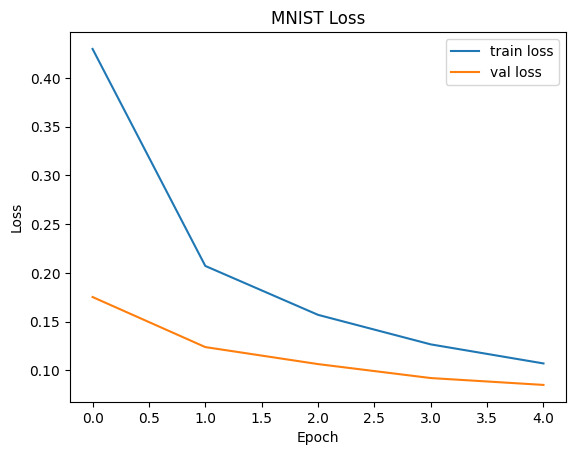

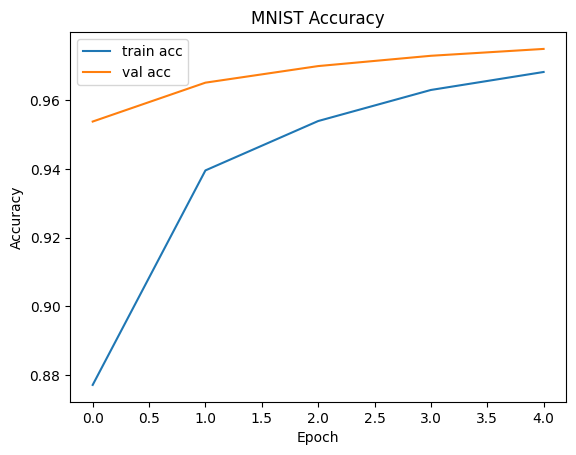

In [20]:
test_loss, test_acc = mnist_model.evaluate(x_test, y_test, verbose=0)  # final test metrics
print(f"MNIST — test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")                # report metrics

# Plot loss over epochs to diagnose under/overfitting
plt.figure()
plt.plot(history_mnist.history["loss"], label="train loss")      # training loss curve
plt.plot(history_mnist.history["val_loss"], label="val loss")    # validation loss curve
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.title("MNIST Loss")
plt.show()

# Plot accuracy to see learning progress
plt.figure()
plt.plot(history_mnist.history["accuracy"], label="train acc")        # training accuracy
plt.plot(history_mnist.history["val_accuracy"], label="val acc")      # validation accuracy
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("MNIST Accuracy")
plt.show()

## B) **IMDb — 1) Load & preprocess**
We cap the vocabulary to reduce sparsity/overfitting and pad/truncate to a fixed length so batches form tidy tensors. vocab: Vocabulary size limits how many unique tokens are modeled.
padding: Padding makes all sequences the same length for batching.
truncating: Truncating shortens long sequences so they fit the maximum length.

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  # sequence padding util
from tensorflow import keras
num_words = 10_000                      # limit vocabulary to most frequent 10k words
maxlen = 200                            # fixed-length sequences for batching
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)  # load tokenized reviews
X_train = pad_sequences(X_train, maxlen=maxlen, truncating="post", padding="post")  # pad/cut to maxlen
X_test  = pad_sequences(X_test,  maxlen=maxlen, truncating="post", padding="post")  # same for test
print(X_train.shape, X_test.shape)      # both -> (25000, 200)

(25000, 200) (25000, 200)


### B) **IMDb — 2) Define model**
We learn dense token embeddings (compact semantics), average them with GAP to get a fixed-size review vector, then classify sentiment with a single sigmoid unit. embedding: An embedding maps token IDs to dense vectors capturing semantic relationships.
gap: GlobalAveragePooling1D averages features over time, making a fixed-size representation.
sigmoid: Sigmoid maps inputs to (0,1), i.e., probabilities for binary tasks.

In [22]:
imdb_model = keras.Sequential([
    keras.layers.Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),  # word embeddings
    keras.layers.GlobalAveragePooling1D(),                                            # average embeddings across tokens
    keras.layers.Dense(64, activation="relu"),                                        # hidden layer
    keras.layers.Dropout(0.2),                                                        # regularization
    keras.layers.Dense(1, activation="sigmoid")                                       # binary sentiment -> probability
])

C:\Users\pablo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### B) **IMDb — 3) Compile**
We use a binary loss/metric pair that directly reflects yes/no sentiment correctness. binary ce: Binary cross-entropy is a loss for two-class problems.

In [23]:
imdb_model.compile(
    optimizer="adam",                    # default Adam
    loss="binary_crossentropy",          # binary labels (0/1)
    metrics=["accuracy"]                 # accuracy for readability
)

## B) **IMDb — 4) Train**
We train with a larger batch for throughput; validation split helps us watch generalization and adjust hyperparameters.

In [24]:
history_imdb = imdb_model.fit(
    X_train, y_train,
    epochs=20,                           # a few epochs for demo
    batch_size=512,                     # bigger batch for speed on accelerators
    validation_split=0.2,               # hold-out validation
    verbose=1                           # progress bar
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6309 - loss: 0.6816 - val_accuracy: 0.7228 - val_loss: 0.6529
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7440 - loss: 0.6006 - val_accuracy: 0.7836 - val_loss: 0.5280
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8095 - loss: 0.4656 - val_accuracy: 0.8212 - val_loss: 0.4219
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8469 - loss: 0.3735 - val_accuracy: 0.8530 - val_loss: 0.3642
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8737 - loss: 0.3176 - val_accuracy: 0.8558 - val_loss: 0.3418
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8878 - loss: 0.2845 - val_accuracy: 0.8592 - val_loss: 0.3276
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9007 - loss: 0.2588 - val_accuracy: 0.8624 - val_loss: 0.3239
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9108 - loss: 0.2369 - val_accuracy: 0.8688 - v

### B) **IMDb — 5) Evaluate + Plot**
We check test metrics and visualize loss/accuracy to spot overfitting or underfitting patterns.

IMDb — test loss: 0.4429 | test acc: 0.8432


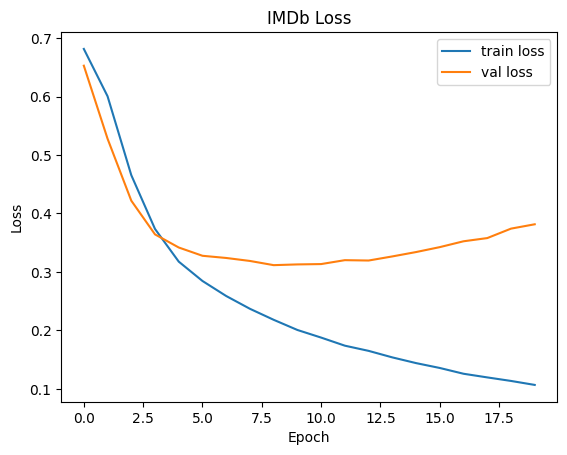

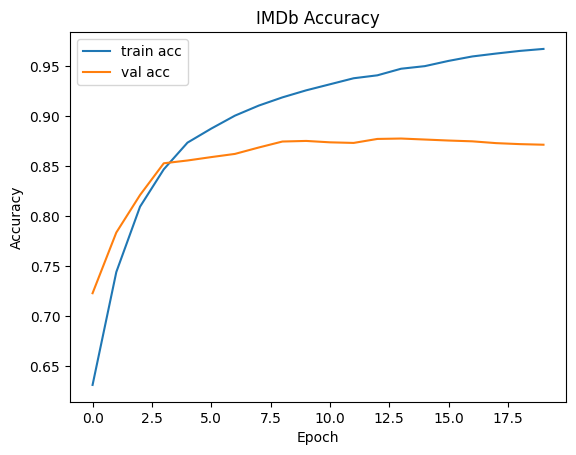

In [25]:
loss, acc = imdb_model.evaluate(X_test, y_test, verbose=0) # test set metrics
print(f"IMDb — test loss: {loss:.4f} | test acc: {acc:.4f}")                # report

# Plot loss curves to inspect bias/variance
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history_imdb.history["loss"], label="train loss")
plt.plot(history_imdb.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.title("IMDb Loss")
plt.show()

# Plot accuracy curves to see performance trend
plt.figure()
plt.plot(history_imdb.history["accuracy"], label="train acc")
plt.plot(history_imdb.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("IMDb Accuracy")
plt.show()